In [11]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import models
from keras import layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from util.plots import plot_history

In [31]:
train_path = 'res_still/train'
valid_path = 'res_still/valid'
test_path = 'res_still/test'

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35))

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=50,
        classes=['potato', 'catfood', 'table'])

Found 355 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [3]:
base_model = mobilenet.MobileNet(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

In [4]:
for layer in base_model.layers:
    layer.trainable=False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)

model.summary()
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [5]:
history = model.fit_generator(
              train_generator,
              steps_per_epoch=355 // batch_size,
              epochs=100,
              validation_data=validation_generator,
              validation_steps= 100 // batch_size)

Epoch 1/100
11/11 [==============================] - 6s 502ms/step - loss: 0.8355 - acc: 0.6714 - val_loss: 0.6431 - val_acc: 0.7917
Epoch 2/100
11/11 [==============================] - 5s 424ms/step - loss: 0.3444 - acc: 0.9055 - val_loss: 0.4361 - val_acc: 0.8824
Epoch 3/100
11/11 [==============================] - 5s 442ms/step - loss: 0.1751 - acc: 0.9659 - val_loss: 0.4552 - val_acc: 0.8676
Epoch 4/100
11/11 [==============================] - 4s 370ms/step - loss: 0.1840 - acc: 0.9685 - val_loss: 0.2391 - val_acc: 0.9706
Epoch 5/100
11/11 [==============================] - 4s 386ms/step - loss: 0.2316 - acc: 0.9200 - val_loss: 0.3197 - val_acc: 0.9271
Epoch 6/100
11/11 [==============================] - 5s 483ms/step - loss: 0.1175 - acc: 0.9744 - val_loss: 0.2567 - val_acc: 0.9412
Epoch 7/100
11/11 [==============================] - 4s 353ms/step - loss: 0.1312 - acc: 0.9488 - val_loss: 0.2220 - val_acc: 0.9559
Epoch 8/100
11/11 [==============================] - 4s 379ms/step - 

11/11 [==============================] - 5s 448ms/step - loss: 0.0241 - acc: 0.9972 - val_loss: 0.1132 - val_acc: 0.9706
Epoch 63/100
11/11 [==============================] - 5s 410ms/step - loss: 0.0392 - acc: 0.9856 - val_loss: 0.0790 - val_acc: 0.9853
Epoch 64/100
11/11 [==============================] - 4s 360ms/step - loss: 0.0148 - acc: 0.9971 - val_loss: 0.0446 - val_acc: 0.9853
Epoch 65/100
11/11 [==============================] - 5s 453ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0535 - val_acc: 0.9792
Epoch 66/100
11/11 [==============================] - 5s 437ms/step - loss: 0.1064 - acc: 0.9633 - val_loss: 0.1660 - val_acc: 0.9265
Epoch 67/100
11/11 [==============================] - 5s 425ms/step - loss: 0.1044 - acc: 0.9659 - val_loss: 0.0628 - val_acc: 0.9853
Epoch 68/100
11/11 [==============================] - 4s 326ms/step - loss: 0.0197 - acc: 0.9971 - val_loss: 0.0919 - val_acc: 0.9706
Epoch 69/100
11/11 [==============================] - 5s 490ms/step - loss:

In [32]:
imgs, labels = next(test_generator)

model.evaluate(imgs,labels, batch_size=50)

50/50 [==============================] - 1s 10ms/step


[0.03762130066752434, 0.9800000190734863]

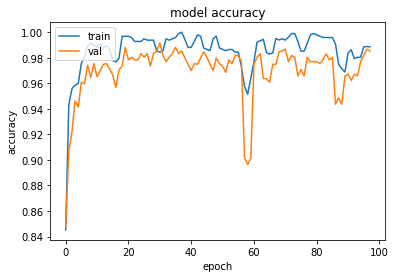

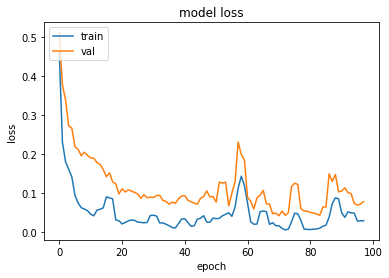

In [8]:
plot_history(history, mean_N=3, save=True, path='nets/mobile_net/', name='plot4')

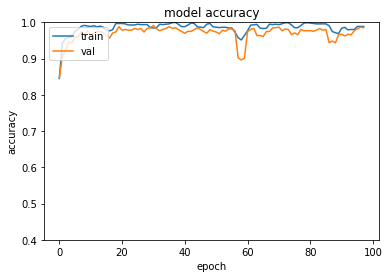

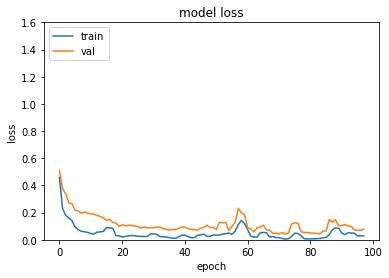

In [23]:
from importlib import reload
import util.plots
reload(util.plots)
from util.plots import plot_history
plot_history(history, mean_N=3, save=True, path='nets/mobile_net/', name='plot4', ylim_acc=(0.4,1.000), ylim_loss=(0.0,1.6))

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("nets/mobile_net/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("nets/mobile_net/model.h5")